In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Research data files
auto_stocks = "Stock_Data/Auto_stock_data.csv"
SP = "Stock_Data/Stock_Data.csv"
car_sales = "Car_sales_Data/Car_data.csv"
autogroup_marketshare = "Car_sales_Data/Autogroup_marketshare_est.csv"

# Read the data 
autostocks_data = pd.read_csv(auto_stocks)  # Auto stocks daily price data for 2019 and 2020
SP_data = pd.read_csv(SP)   # S&P daily price data for 2019 and 2020
car_sales_data = pd.read_csv(car_sales)  # Avg car brand sales price for grouping
AG_marketshare_data = pd.read_csv(autogroup_marketshare)  # Avg Auto Group marketshare for grouping

In [2]:
# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Co
0,1/2/2019,7.530000,8.020000,7.480000,7.900000,7.157524,47494400,F,Ford
1,1/3/2019,7.970000,7.990000,7.780000,7.780000,7.048802,39172400,F,Ford
2,1/4/2019,7.910000,8.120000,7.850000,8.080000,7.320606,43039800,F,Ford
3,1/7/2019,8.110000,8.370000,8.030000,8.290000,7.510870,40729400,F,Ford
4,1/8/2019,8.420000,8.540000,8.350000,8.370000,7.583352,45644000,F,Ford
...,...,...,...,...,...,...,...,...,...
10322,12/4/2020,0.043923,0.043923,0.043923,0.043923,0.043923,0,3ML.F,McLaren
10323,12/7/2020,0.057100,0.057100,0.043923,0.043923,0.043923,22000,3ML.F,McLaren
10324,12/8/2020,0.032942,0.032942,0.032942,0.032942,0.032942,0,3ML.F,McLaren
10325,12/9/2020,0.032942,0.057832,0.032942,0.057832,0.057832,2000,3ML.F,McLaren


In [3]:
# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Volume','Adj Close','Open','Close'],axis=1)

# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,High,Low,Ticker,Co
0,1/2/2019,8.020000,7.480000,F,Ford
1,1/3/2019,7.990000,7.780000,F,Ford
2,1/4/2019,8.120000,7.850000,F,Ford
3,1/7/2019,8.370000,8.030000,F,Ford
4,1/8/2019,8.540000,8.350000,F,Ford
...,...,...,...,...,...
10322,12/4/2020,0.043923,0.043923,3ML.F,McLaren
10323,12/7/2020,0.057100,0.043923,3ML.F,McLaren
10324,12/8/2020,0.032942,0.032942,3ML.F,McLaren
10325,12/9/2020,0.057832,0.032942,3ML.F,McLaren


In [4]:
# Calculate Daily Average Price from the day's High and Low price.
autostocks_data["Avg Stock Price"] = (autostocks_data["High"] + autostocks_data["Low"])/2

# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,High,Low,Ticker,Co,Avg Stock Price
0,1/2/2019,8.020000,7.480000,F,Ford,7.750000
1,1/3/2019,7.990000,7.780000,F,Ford,7.885000
2,1/4/2019,8.120000,7.850000,F,Ford,7.985000
3,1/7/2019,8.370000,8.030000,F,Ford,8.200000
4,1/8/2019,8.540000,8.350000,F,Ford,8.445000
...,...,...,...,...,...,...
10322,12/4/2020,0.043923,0.043923,3ML.F,McLaren,0.043923
10323,12/7/2020,0.057100,0.043923,3ML.F,McLaren,0.050511
10324,12/8/2020,0.032942,0.032942,3ML.F,McLaren,0.032942
10325,12/9/2020,0.057832,0.032942,3ML.F,McLaren,0.045387


In [5]:
# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Low','High'],axis=1)

# Re-order Columns
autostocks_data = autostocks_data[['Date', 'Co','Ticker','Avg Stock Price']]

# Rename column- required for data merge later
autostocks_data = autostocks_data.rename(columns={'Co': 'Auto Group'})

# Remove S&P data beyond the end of the 3Q 2020
autostocks_data['Date'] = pd.to_datetime(autostocks_data['Date'])

autostocks_data = autostocks_data[autostocks_data['Date'] <= '10/1/2020']

# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price
0,2019-01-02,Ford,F,7.750000
1,2019-01-03,Ford,F,7.885000
2,2019-01-04,Ford,F,7.985000
3,2019-01-07,Ford,F,8.200000
4,2019-01-08,Ford,F,8.445000
...,...,...,...,...
10272,2020-09-25,McLaren,3ML.F,0.056368
10273,2020-09-28,McLaren,3ML.F,0.056368
10274,2020-09-29,McLaren,3ML.F,0.056368
10275,2020-09-30,McLaren,3ML.F,0.055636


In [6]:
# Checking the number of unique auto stock tickers in the clean DataFrame.
unique = autostocks_data["Auto Group"].unique()
count = len(unique)
print("No. of auto stocks:",count)
print(unique)

No. of auto stocks: 21
['Ford' 'Tesla' 'Ferrari' 'Honda' 'Toyota' 'TaTa' 'Fiat Chrysler' 'Audi'
 'BMW' 'GM' 'Hyundai' 'Nissan' 'Kia' 'Mazda' 'Daimler' 'Mitsubishi'
 'Porsche' 'Subaru' 'VW' 'Volvo' 'McLaren']


In [7]:
car_sales_data = car_sales_data.drop(['Q1 2019','Q2 2019','Q3 2019','Q4 2019','Q1 2020','Q2 2020','Q3 2020','Q4 2020'],axis=1)

# Rename column- required for data merge later
car_sales_data = car_sales_data.rename(columns={'Autogroup': 'Auto Group','Avg Price':'Avg Car Price'})

# Remove Ultra luxury brands that are part of larger auto groups to prevent significant skewing of avg car price of group
car_sales_data = car_sales_data.sort_values("Auto Group", ascending = False)
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bugatti']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Lamborghini']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bentley']

car_sales_data

,Brand,Auto Group,Avg Car Price
39,Volvo,Volvo,50000
38,Volkswagen,VW,30000
24,Lexus,Toyota,56000
37,Toyota,Toyota,34000
36,Tesla,Tesla,60000
19,Jaguar,TaTa,52000
23,Land Rover,TaTa,59000
35,Subaru,Subaru,31000
33,Porsche,Porsche,73000
32,Nissan,Nissan,30000


In [8]:
# Calculations
autogroup_sales_data = car_sales_data.groupby(['Auto Group']).mean().round(2)

print("No. of autogroups:", len(autogroup_sales_data))
autogroup_sales_data

No. of autogroups: 21


,Avg Car Price
Auto Group,
Audi,59017.00
BMW,48500.00
Daimler,58000.00
Ferrari,300000.00
Fiat Chrysler,40142.86
Ford,42000.00
GM,38750.00
Honda,34000.00
Hyundai,39500.00


In [9]:
merged_autostocks_data = autostocks_data.merge(autogroup_sales_data, on='Auto Group')

merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price
0,2019-01-02,Ford,F,7.750000,42000.0
1,2019-01-03,Ford,F,7.885000,42000.0
2,2019-01-04,Ford,F,7.985000,42000.0
3,2019-01-07,Ford,F,8.200000,42000.0
4,2019-01-08,Ford,F,8.445000,42000.0
...,...,...,...,...,...
9286,2020-09-25,McLaren,3ML.F,0.056368,250000.0
9287,2020-09-28,McLaren,3ML.F,0.056368,250000.0
9288,2020-09-29,McLaren,3ML.F,0.056368,250000.0
9289,2020-09-30,McLaren,3ML.F,0.055636,250000.0


In [10]:
merged_autostocks_data = merged_autostocks_data.merge(AG_marketshare_data, on='Auto Group')

merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price,Segment Market Share
0,2019-01-02,Ford,F,7.750000,42000.0,0.1728
1,2019-01-03,Ford,F,7.885000,42000.0,0.1728
2,2019-01-04,Ford,F,7.985000,42000.0,0.1728
3,2019-01-07,Ford,F,8.200000,42000.0,0.1728
4,2019-01-08,Ford,F,8.445000,42000.0,0.1728
...,...,...,...,...,...,...
9286,2020-09-25,McLaren,3ML.F,0.056368,250000.0,0.0256
9287,2020-09-28,McLaren,3ML.F,0.056368,250000.0,0.0256
9288,2020-09-29,McLaren,3ML.F,0.056368,250000.0,0.0256
9289,2020-09-30,McLaren,3ML.F,0.055636,250000.0,0.0256


In [11]:
# Create new columns for Segment

# Create a list of our segments
segments = [
    (merged_autostocks_data['Avg Car Price'] <= 30000),
    (merged_autostocks_data['Avg Car Price'] > 30000) & (merged_autostocks_data['Avg Car Price'] <= 45000),
    (merged_autostocks_data['Avg Car Price'] > 45000) & (merged_autostocks_data['Avg Car Price'] <= 70000),
    (merged_autostocks_data['Avg Car Price'] > 70000)
    ]

# Create a list of the values we want to assign for each segment.
values = ['Economy', 'Mid-Range', 'Luxury', 'Ultra Luxury']

# Create a new column and use np.select to assign values to it using our lists as arguments
merged_autostocks_data["Segment"] = np.select(segments, values)

# Display updated DataFrame
merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price,Segment Market Share,Segment
0,2019-01-02,Ford,F,7.750000,42000.0,0.1728,Mid-Range
1,2019-01-03,Ford,F,7.885000,42000.0,0.1728,Mid-Range
2,2019-01-04,Ford,F,7.985000,42000.0,0.1728,Mid-Range
3,2019-01-07,Ford,F,8.200000,42000.0,0.1728,Mid-Range
4,2019-01-08,Ford,F,8.445000,42000.0,0.1728,Mid-Range
...,...,...,...,...,...,...,...
9286,2020-09-25,McLaren,3ML.F,0.056368,250000.0,0.0256,Ultra Luxury
9287,2020-09-28,McLaren,3ML.F,0.056368,250000.0,0.0256,Ultra Luxury
9288,2020-09-29,McLaren,3ML.F,0.056368,250000.0,0.0256,Ultra Luxury
9289,2020-09-30,McLaren,3ML.F,0.055636,250000.0,0.0256,Ultra Luxury


In [12]:
# Create weighted average component of each segment by each Auto Group to create Segment Price Index
merged_autostocks_data["Stock WtAvg"] = merged_autostocks_data["Avg Stock Price"] * merged_autostocks_data["Segment Market Share"]

# Delete unnecessary columns
merged_autostocks_data = merged_autostocks_data.drop(['Avg Car Price','Segment Market Share','Auto Group','Ticker','Avg Stock Price'],axis=1)

merged_autostocks_data

,Date,Segment,Stock WtAvg
0,2019-01-02,Mid-Range,1.339200
1,2019-01-03,Mid-Range,1.362528
2,2019-01-04,Mid-Range,1.379808
3,2019-01-07,Mid-Range,1.416960
4,2019-01-08,Mid-Range,1.459296
...,...,...,...
9286,2020-09-25,Ultra Luxury,0.001443
9287,2020-09-28,Ultra Luxury,0.001443
9288,2020-09-29,Ultra Luxury,0.001443
9289,2020-09-30,Ultra Luxury,0.001424


In [13]:
# Group by Date and Market Segment
Economy = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Economy"), :]
Econ = Economy['Stock WtAvg'].to_numpy()

MidRange = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Mid-Range"), :]
Mid = MidRange['Stock WtAvg'].to_numpy()

Luxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Luxury"), :]
Lux = Luxury['Stock WtAvg'].to_numpy()

UltraLuxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Ultra Luxury"), :]
Ultra = UltraLuxury['Stock WtAvg'].to_numpy()

AG_arrays = [Econ, Mid, Lux, Ultra]  #Create list of arrays

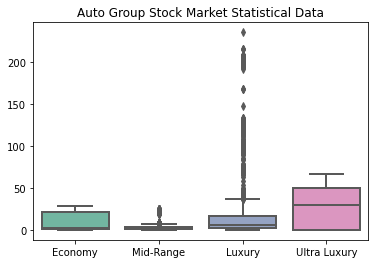

In [20]:
import seaborn as sns
autosegments = ["Economy", "Mid-Range", "Luxury", "Ultra Luxury"]                  #Lots to do here

# Create boxplot with large flier size for the outlier(s)
ax = sns.boxplot(data=AG_arrays, linewidth=2, palette="Set2",fliersize=5)

# Create overlying stripplot to visualize distribution, including outlier(s)
#bx = sns.stripplot(data=AG_arrays, jitter=False, marker='o', alpha=0.8, color="yellow")

# Custom Title
ax.set_title('Auto Group Stock Market Statistical Data')

# Custom x-axis labels
ax.set_xticklabels(["Economy", "Mid-Range", "Luxury", "Ultra Luxury"])
#ax.set(ylabel = "Tumor Volume, mm")

# Remove top axes
ax.get_xaxis().tick_bottom()

In [ ]:
#minvalue = clean_autostocks_data.loc[clean_autostocks_data['Avg Price'].idxmin()]  # Min price for Y-axis
#print(minvalue)
#maxvalue = clean_autostocks_data.loc[clean_autostocks_data['Avg Price'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
#clean_autostocks_data.plot.line(x='Date', y='Avg Price', legend = False, rot=60, title="S&P Price Change from 2019 to 2020");

# Sets the y limits
#plt.ylim(2000, 3800)

# Provides labels
#plt.xlabel(" ")
#plt.ylabel("Stock Price")

# Save the figure as .png
#plt.savefig('Images/stock Price Change.png')

#plt.show(block=True)